In [1]:
#yfinance is a popular Python library used for downloading historical market data from Yahoo Finance.
#It simplifies the process of accessing financial data for various securities, including stocks, commodities, cryptocurrencies, and more

!pip install yfinance

In [2]:
import seaborn as sns 
import yfinance as yf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
#The code fetches historical price data for Bitcoin, Ethereum, Tether, and Binance Coin for the past 5 years and keeps only the Close and Volume columns for each of these cryptocurrencies.
#This cleaned data can then be used for further analysis or machine learning tasks, such as predicting future prices.

btc = yf.Ticker('BTC-USD')
prices1 =btc.history(period ='5y')
prices1.drop(columns=['Open','High','Low','Dividends','Stock Splits'],axis = 1,inplace = True)
  
eth = yf.Ticker('ETH-USD')
prices2 =eth.history(period ='5y')
prices2.drop(columns=['Open','High','Low','Dividends','Stock Splits'],axis = 1,inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 =usdt.history(period ='5y')
prices3.drop(columns=['Open','High','Low','Dividends','Stock Splits'],axis = 1,inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 =bnb.history(period ='5y')
prices4.drop(columns=['Open','High','Low','Dividends','Stock Splits'],axis = 1,inplace = True)
        

In [4]:
#The parameters lsuffix and rsuffix in the join method are used to add suffixes to overlapping column names when joining two DataFrames
# This is necessary to avoid column name conflicts when the two DataFrames have columns with the same name.

p1 = prices1.join(prices2,lsuffix = ' (BTC)',rsuffix = ' (ETH)')
p2 = prices3.join(prices4,lsuffix = ' (USDT)',rsuffix = ' (BNB)')
data = p1.join(p2,lsuffix = '_',rsuffix = '_')

In [5]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2021-01-04 00:00:00+00:00,31971.914062,81163475344,1040.233032,56945985763,1.000128,125906387011,40.926353,807877171
2021-01-05 00:00:00+00:00,33992.429688,67547324782,1100.006104,41535932781,1.002202,101918715244,41.734600,644270927
2021-01-06 00:00:00+00:00,36824.363281,75289433811,1207.112183,44699914188,1.001528,116105139289,42.165955,641021601
2021-01-07 00:00:00+00:00,39371.042969,84762141031,1225.678101,40468027280,1.000400,129467601516,43.449490,829964770
2021-01-08 00:00:00+00:00,40797.609375,88107519480,1224.197144,44334826666,1.000045,131555961745,42.395317,650561500


In [6]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2025-12-31 00:00:00+00:00,87508.828125,33830210616,2967.037598,16451891101,0.998449,70259461189,863.257385,2539874072
2026-01-01 00:00:00+00:00,88731.984375,18849043990,3000.394287,10268796662,0.998745,50548666268,863.054626,1623168589
2026-01-02 00:00:00+00:00,89944.695312,46398906171,3124.422607,25242778003,0.999672,96128566387,880.844177,2274583336
2026-01-03 00:00:00+00:00,90603.187500,20774828592,3125.917480,11460707919,0.999635,55660104876,878.639465,1660447864
2026-01-04 00:00:00+00:00,91352.718750,24932440064,3140.028320,12528984064,0.999490,60380717056,885.557495,1645686656


In [7]:
data.shape

(1827, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2021-01-04 00:00:00+00:00 to 2026-01-04 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1827 non-null   float64
 1   Volume (BTC)   1827 non-null   int64  
 2   Close (ETH)    1827 non-null   float64
 3   Volume (ETH)   1827 non-null   int64  
 4   Close (USDT)   1827 non-null   float64
 5   Volume (USDT)  1827 non-null   int64  
 6   Close (BNB)    1827 non-null   float64
 7   Volume (BNB)   1827 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.5 KB


In [9]:
data.isnull().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [10]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,54542.351270,3.711348e+10,2538.829696,1.951748e+10,1.000145,7.088779e+10,458.573032,1.847197e+09
std,29488.192732,2.302255e+10,909.032507,1.293500e+10,0.000710,4.502307e+10,220.934544,1.476143e+09
min,15787.284180,5.331173e+09,993.636780,2.081626e+09,0.995872,9.989859e+09,38.111610,2.038465e+08
25%,29412.204102,2.130695e+10,1793.287048,1.025234e+10,0.999893,4.011224e+10,287.487457,8.767998e+08
50%,46612.632812,3.175896e+10,2456.425293,1.643428e+10,1.000142,6.038072e+10,401.652466,1.600856e+09
75%,69324.179688,4.708497e+10,3234.704468,2.502669e+10,1.000383,8.808248e+10,600.126099,2.202072e+09
max,124752.531250,3.509679e+11,4831.348633,9.773662e+10,1.011530,3.443980e+11,1310.214355,1.798295e+10


### Exploratory Data Analysis

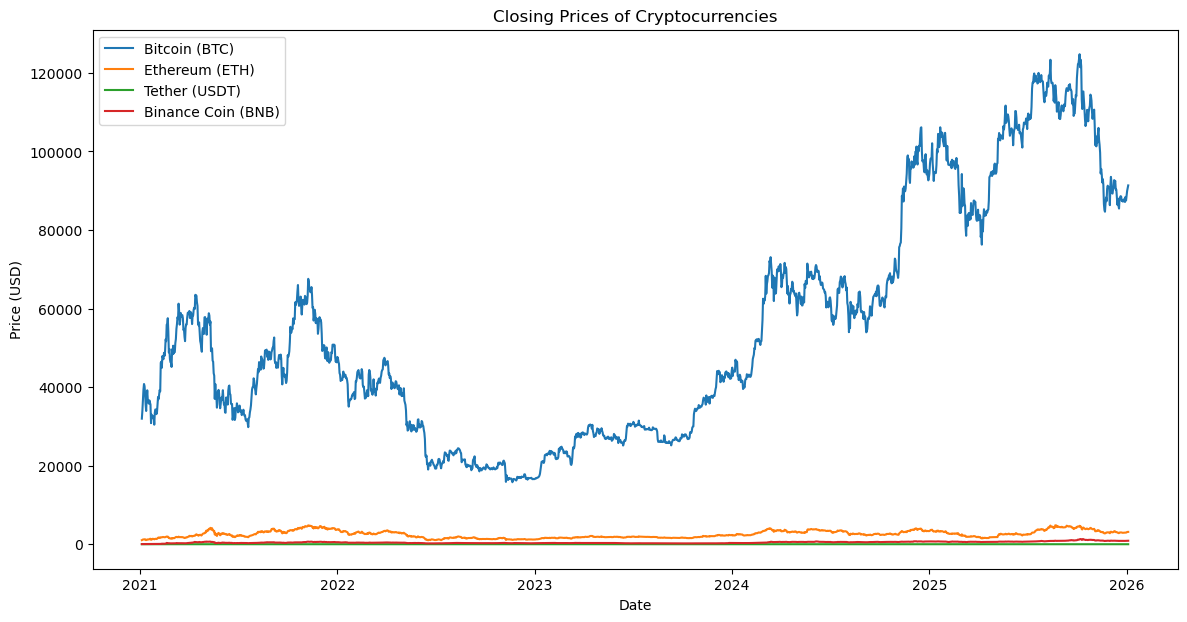

In [11]:
#Visualize the Closing Prices
# create a  line plot to visualize the closing prices of all four cryptocurrencies over time:

plt.figure(figsize = (14,7))
plt.plot(data.index, data['Close (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Close (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Close (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Close (BNB)'],label='Binance Coin (BNB)')
plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

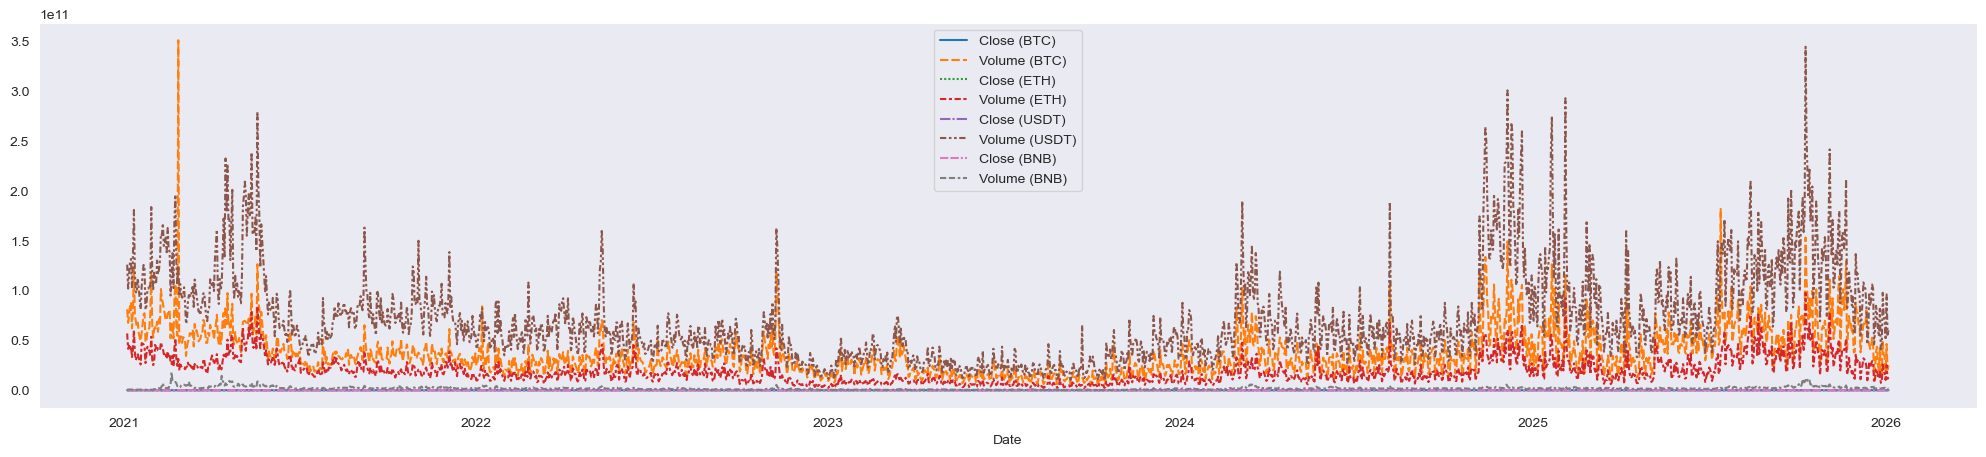

In [12]:
plt.figure(figsize = (25,5))
sns.set_style('dark')
sns.lineplot(data = data)

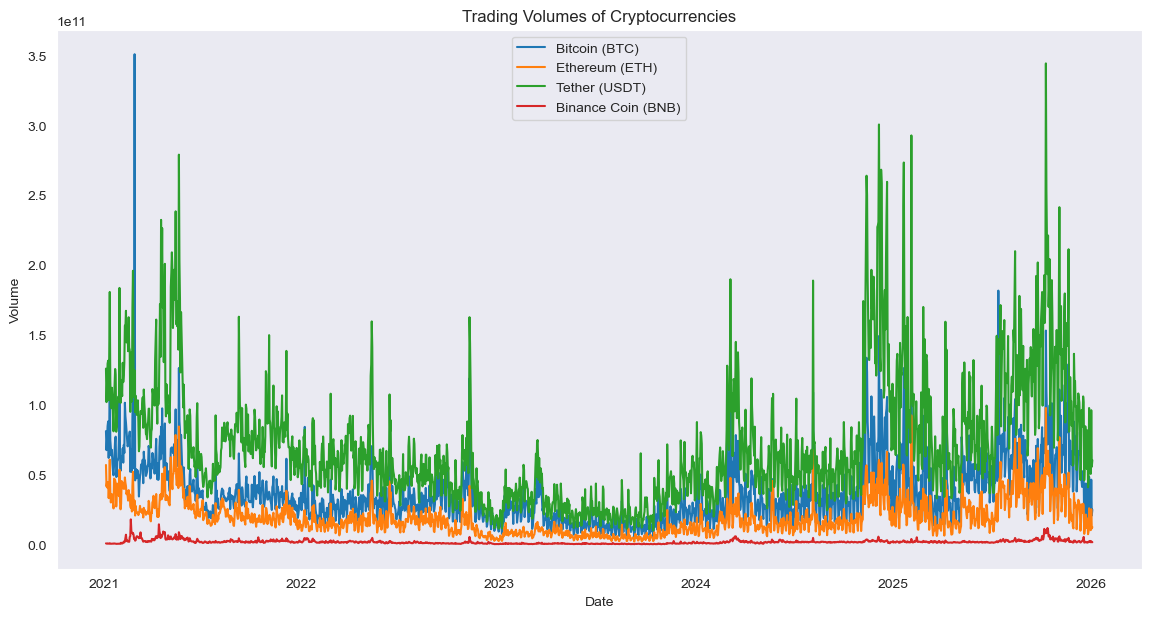

In [13]:
# Visualize the Trading Volumes
# Let's visualize the trading volume of all four cryptocurrencies:

plt.figure(figsize = (14,7))
plt.plot(data.index, data['Volume (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume (BNB)'],label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

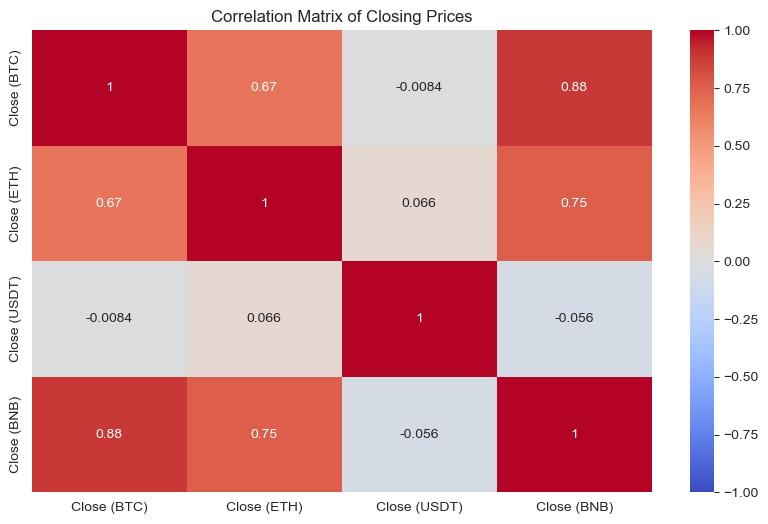

In [14]:
# Correlation Analysis
# we'll analyze the correlation between the closing prices of the cryptocurrencies:
# Calculate the correlation matrix
corr_matrix = data[['Close (BTC)','Close (ETH)','Close (USDT)','Close (BNB)']].corr()

#Plot the heatmap
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1,vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()

Text(0.5, 1.0, 'Distribution of Binance coin (BNB) Closing Prices')

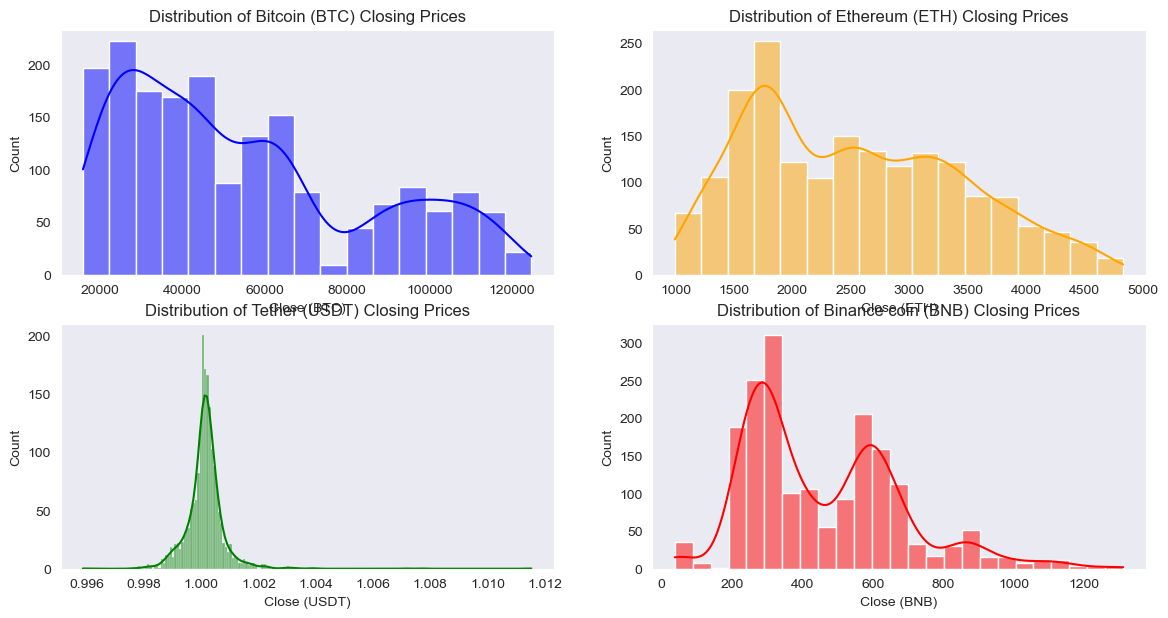

In [15]:
# Distribution of Closing Prices
# Let's plot the distribution of closing prices for each cryptocurrency:
plt.figure(figsize=(14,7))

plt.subplot(2,2,1)
sns.histplot(data['Close (BTC)'],kde=True,color = 'blue')
plt.title('Distribution of Bitcoin (BTC) Closing Prices')

plt.subplot(2,2,2)
sns.histplot(data['Close (ETH)'],kde=True,color = 'orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2,2,3)
sns.histplot(data['Close (USDT)'],kde=True,color = 'green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2,2,4)
sns.histplot(data['Close (BNB)'],kde=True,color = 'red')
plt.title('Distribution of Binance coin (BNB) Closing Prices')

array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

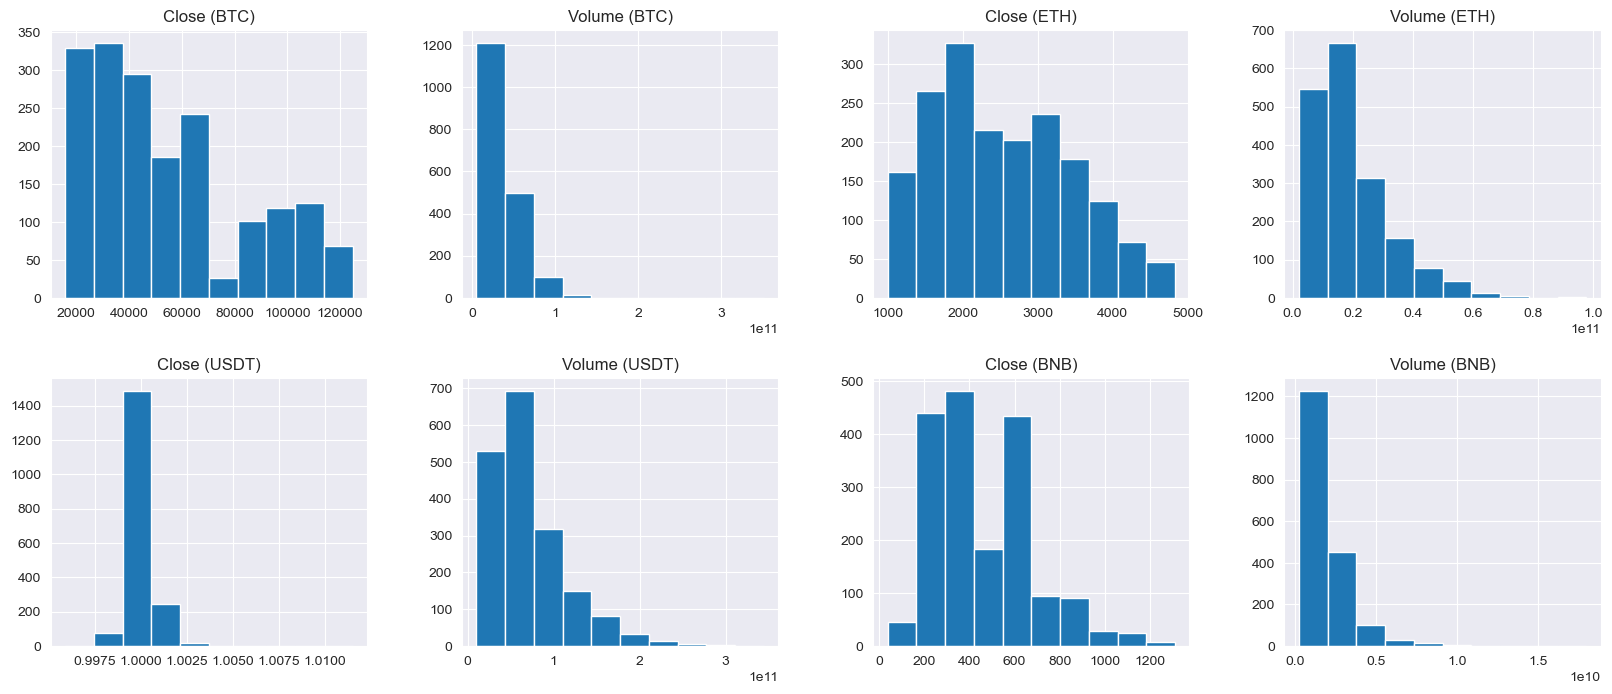

In [16]:
data.hist(figsize=(20,8),layout = (2,4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

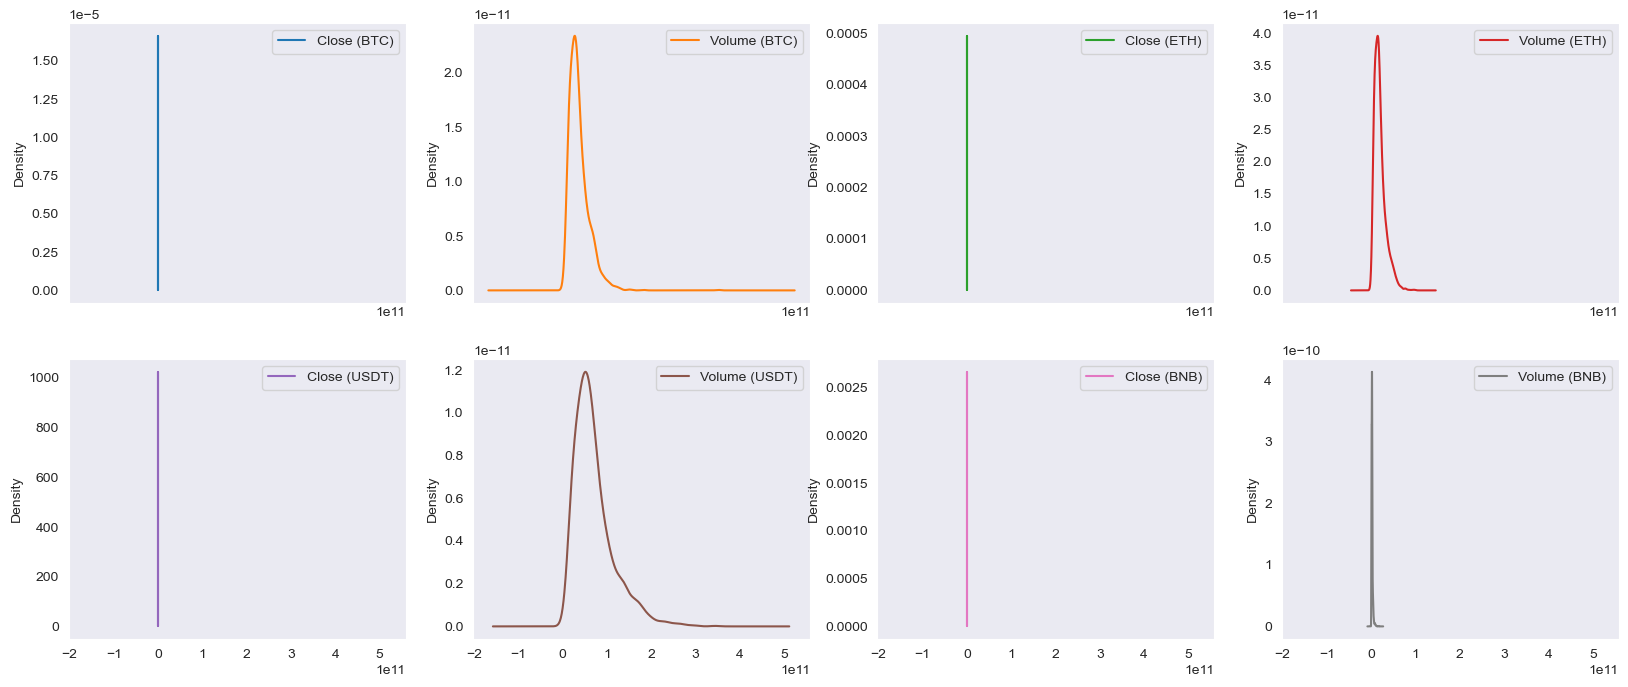

In [17]:
data.plot(kind = 'kde' , subplots = True,layout = (2,4),figsize=(20,8))

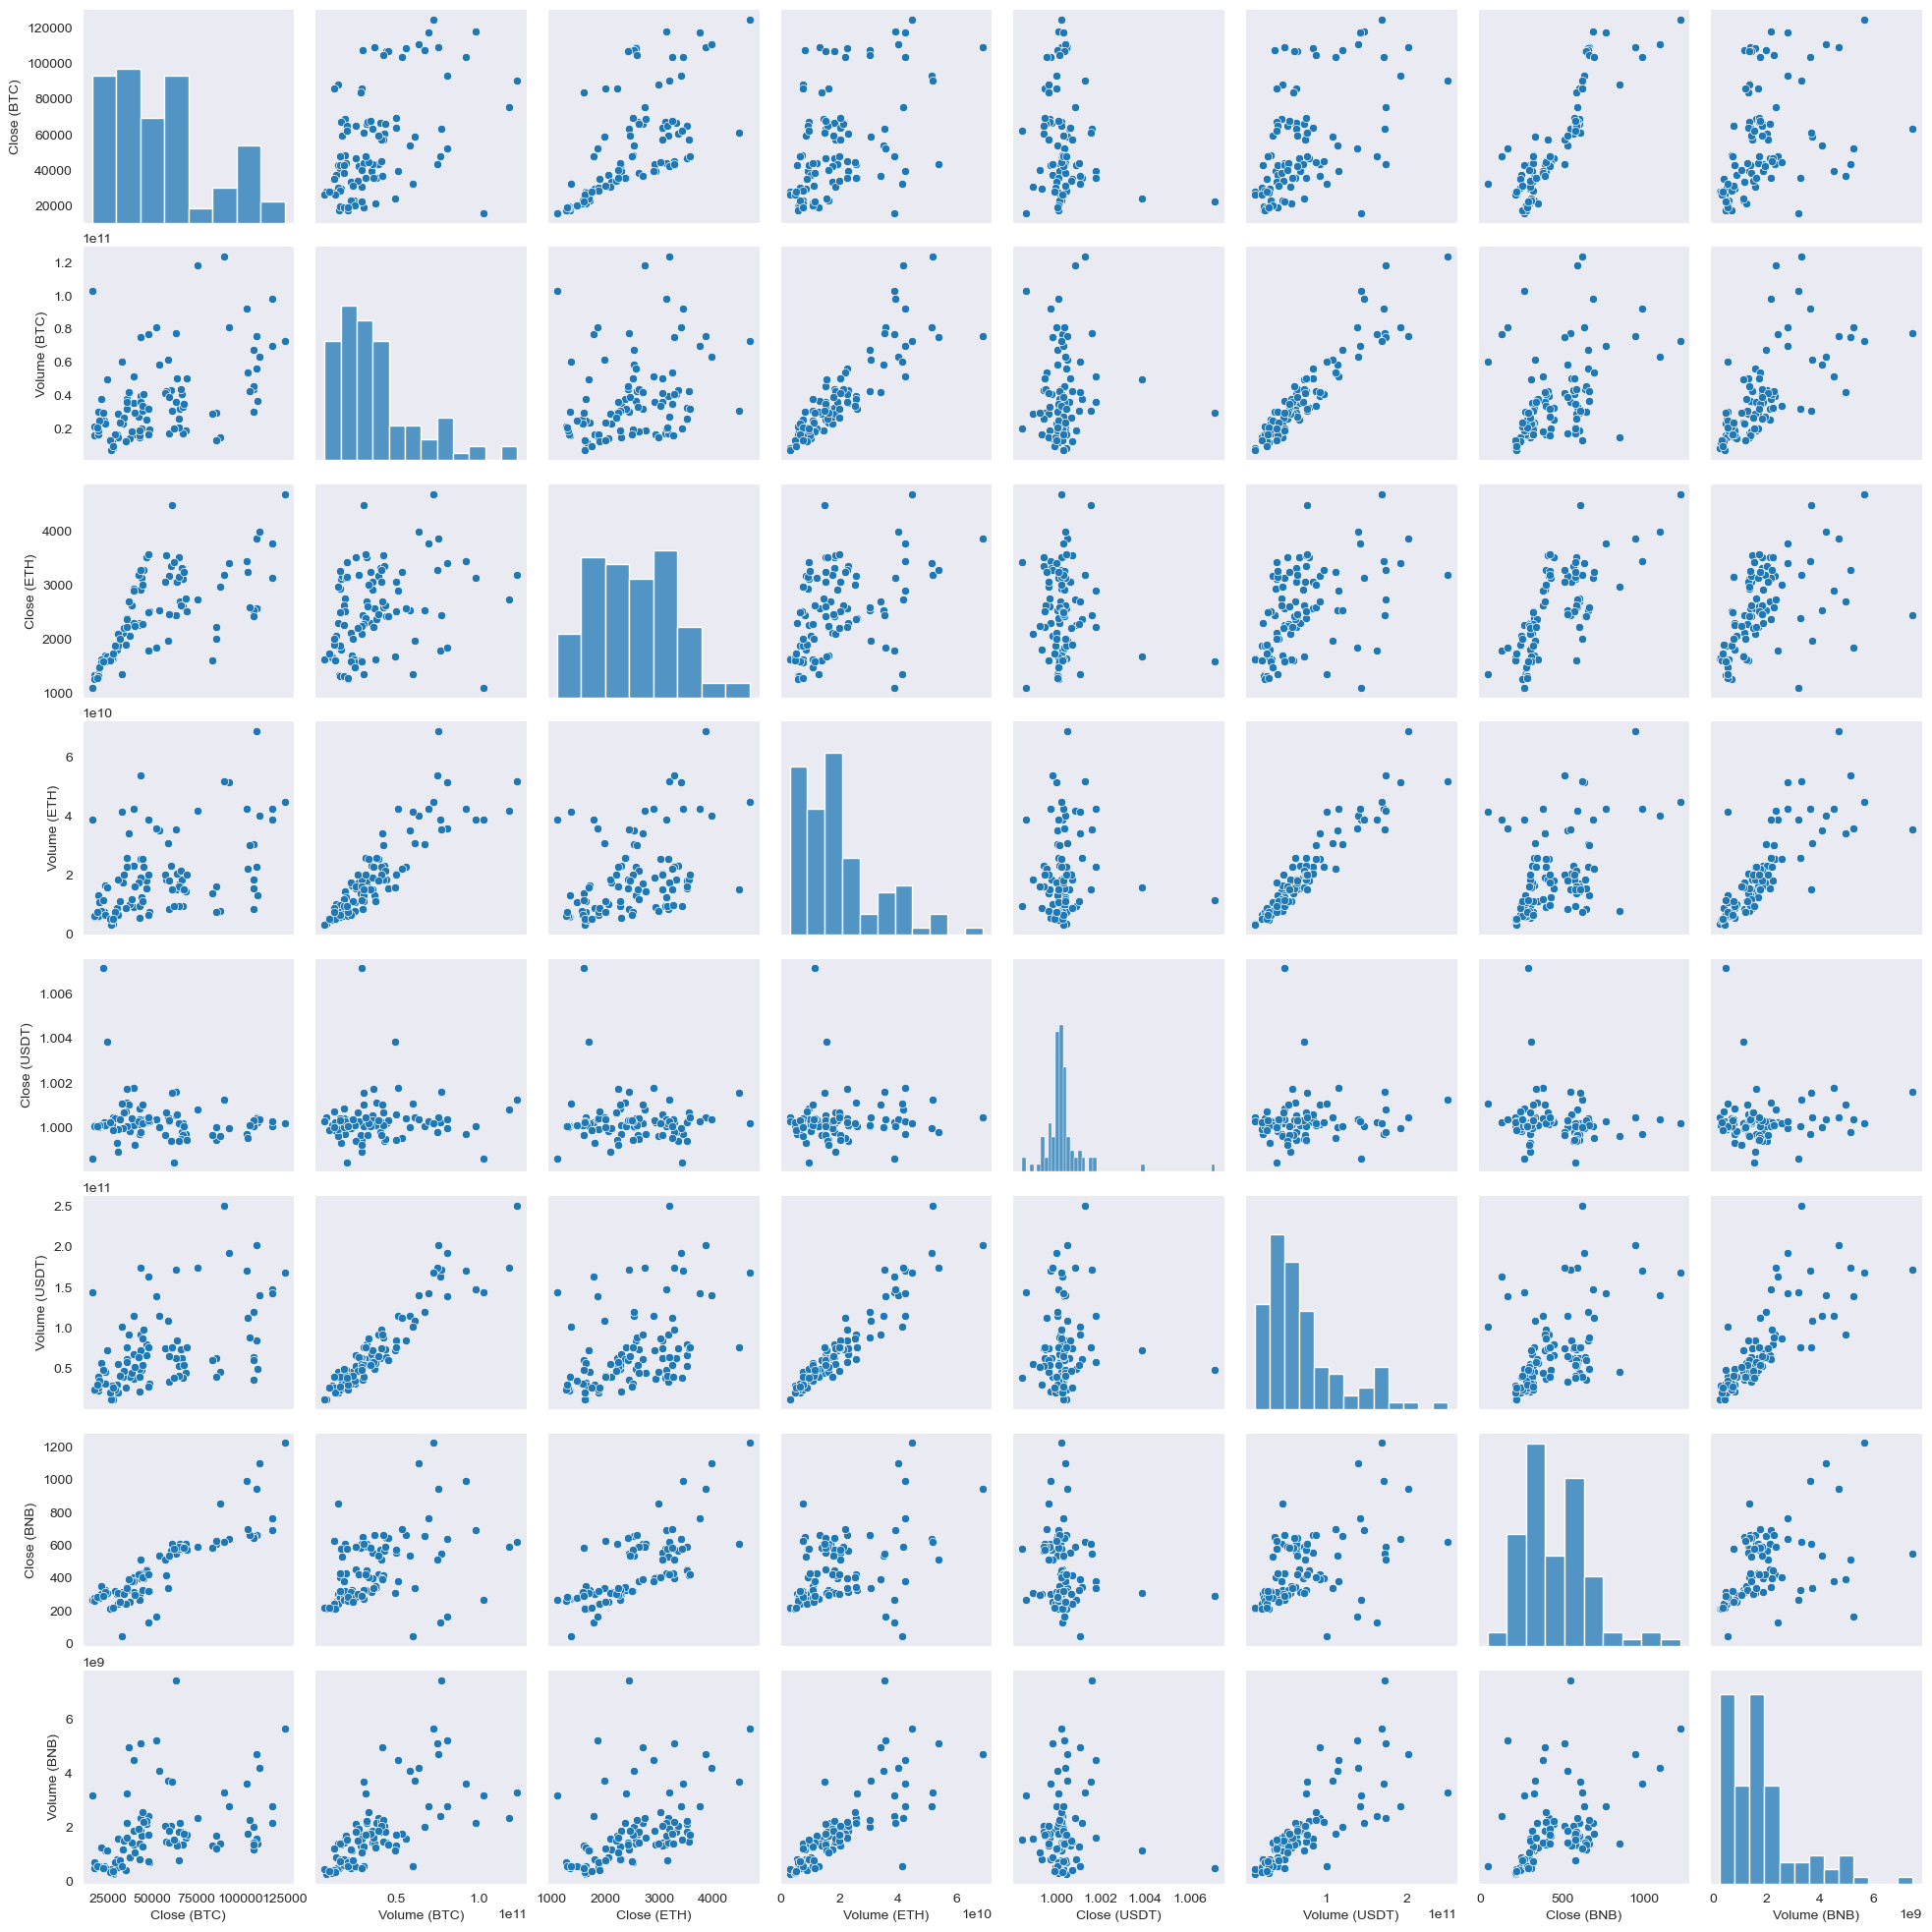

In [18]:
sns.pairplot(data.sample(n=100));

### Data Pre-processing

In [19]:
X = data.drop(columns = ['Close (BTC)'],axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [20]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2021-01-04 00:00:00+00:00,81163475344,1040.233032,56945985763,1.000128,125906387011,40.926353,807877171
2021-01-05 00:00:00+00:00,67547324782,1100.006104,41535932781,1.002202,101918715244,41.734600,644270927
2021-01-06 00:00:00+00:00,75289433811,1207.112183,44699914188,1.001528,116105139289,42.165955,641021601
2021-01-07 00:00:00+00:00,84762141031,1225.678101,40468027280,1.000400,129467601516,43.449490,829964770
2021-01-08 00:00:00+00:00,88107519480,1224.197144,44334826666,1.000045,131555961745,42.395317,650561500


In [21]:
X.tail()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2025-12-31 00:00:00+00:00,33830210616,2967.037598,16451891101,0.998449,70259461189,863.257385,2539874072
2026-01-01 00:00:00+00:00,18849043990,3000.394287,10268796662,0.998745,50548666268,863.054626,1623168589
2026-01-02 00:00:00+00:00,46398906171,3124.422607,25242778003,0.999672,96128566387,880.844177,2274583336
2026-01-03 00:00:00+00:00,20774828592,3125.917480,11460707919,0.999635,55660104876,878.639465,1660447864
2026-01-04 00:00:00+00:00,24932440064,3140.028320,12528984064,0.999490,60380717056,885.557495,1645686656


In [22]:
Y.head()

Date
2021-01-04 00:00:00+00:00    31971.914062
2021-01-05 00:00:00+00:00    33992.429688
2021-01-06 00:00:00+00:00    36824.363281
2021-01-07 00:00:00+00:00    39371.042969
2021-01-08 00:00:00+00:00    40797.609375
Name: Close (BTC), dtype: float64

In [23]:
# Split the data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [24]:
# print the shape of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (1461, 7)
X_test shape: (366, 7)
Y_train shape: (1461,)
Y_test shape: (366,)


In [25]:
#SelectKBest
#SelectKBest is a feature selection method provided by scikit-learn (sklearn) that selects the top k features based on a specified scoring function.
#This function evaluates each feature independently and selects those that have the strongest relationship with the target variable.

#Parameters
#k: Specifies the number of top features to select. In your case, k=4 indicates that you want to select the top 4 features
from sklearn .feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train,Y_train)
X_test = fs.transform(X_test)

c:\Users\ankus\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [26]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features:",selected_features)

Selected Features: Index(['Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'], dtype='object')


In [27]:
X_train

array([[1.00017798e+00, 8.14116305e+10, 4.21643188e+02, 2.16249338e+09],
       [9.99684989e-01, 7.95351909e+10, 4.30988861e+02, 2.54921533e+09],
       [1.00027597e+00, 4.71600623e+10, 2.95161865e+02, 7.00835025e+08],
       ...,
       [1.00007701e+00, 1.47110596e+11, 6.89921143e+02, 2.16720240e+09],
       [9.99733984e-01, 4.21892486e+10, 2.47848480e+02, 1.05086167e+09],
       [9.99101996e-01, 2.32884391e+10, 2.72397675e+02, 5.51451228e+08]])

In [28]:
#MinMaxScaler is a preprocessing method in scikit-learn that transforms features by scaling them to a specified range.
# It's often used when your data needs to be normalized within a specific range to ensure all features contribute equally to the analysis.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# implementaion of 10 different regression algorithm using scikit -learn. Each algorithm is trained and evaluated on a sample dataset:

#Import libraries and generate Sample Data

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,r2_score

----Linear Regression----
Mean squared error(MSE):147143485.56414065
R-squared: 0.8275536661792073

----Ridge Regression----
Mean squared error(MSE):147051452.6909668
R-squared: 0.8276615250593268

----Lasso Regression----
Mean squared error(MSE):147127412.844991
R-squared: 0.8275725027690928

----ElasticNet Regression----
Mean squared error(MSE):748624533.2960148
R-squared: 0.12264171478440788

----Support Vector Regression (SVR)----
Mean squared error(MSE):890400900.1445249
R-squared: -0.043514568599269055

----Decision Tree Regression----
Mean squared error(MSE):79683529.05134234
R-squared: 0.9066140617906133

----Random Forest Regression----
Mean squared error(MSE):46150939.8555103
R-squared: 0.9459129274398119

----Gradient Boosting Regression----
Mean squared error(MSE):56456984.77340719
R-squared: 0.9338346512220788

----K-Nearest Neighbors Regression----
Mean squared error(MSE):54084081.367977455
R-squared: 0.9366155999756602

----Neural Network Regression (MLP)----
Mean square

c:\Users\ankus\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


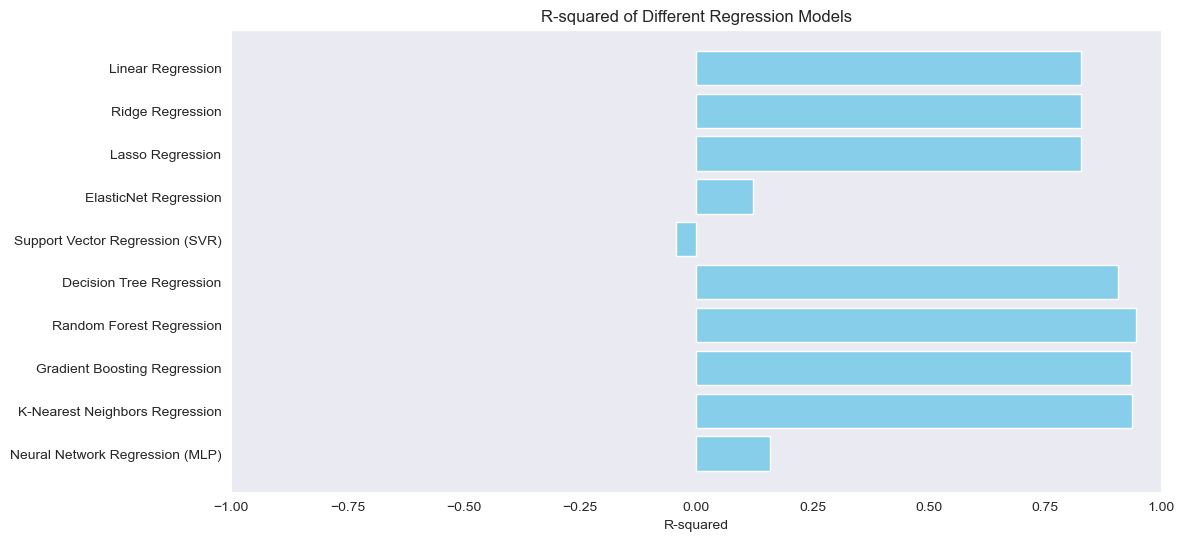

In [30]:
#Define Models and Perform Training and Evaluation

models = {
     'Linear Regression': LinearRegression(),
     'Ridge Regression' : Ridge(alpha=1.0),
     'Lasso Regression' : Lasso(alpha = 1.0),
     'ElasticNet Regression': ElasticNet(alpha =1.0,l1_ratio=0.5),
     'Support Vector Regression (SVR)': SVR(kernel='rbf'),
     'Decision Tree Regression': DecisionTreeRegressor(),
     'Random Forest Regression': RandomForestRegressor(n_estimators=100),
     'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100,learning_rate=0.1),
     'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
     'Neural Network Regression (MLP)':MLPRegressor(hidden_layer_sizes=(100,50),activation='relu',solver='adam')
    }

#Train and evaluate each model
results = {'Model': [],'MSE':[],'R-squared': []}

for name,model in models.items():
    #train the model
    model.fit(X_train,Y_train)
    
    #Predict on test set
    y_pred = model.predict(X_test)
    
    #Evaluate model
    mse = mean_squared_error(Y_test,y_pred)
    r2 = r2_score(Y_test,y_pred)
    
    #Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)
    
    #Print results
    print(f"----{name}----")
    print(f'Mean squared error(MSE):{mse}')
    print(f"R-squared: {r2}")
    print()
    
#Convert results to Dataframe for visualization
results_df = pd.DataFrame(results)
print(results_df)
    
#plotting the results
plt.figure(figsize=(12,6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1,1)
plt.gca().invert_yaxis()
plt.show()

#Random Forest Regression is a powerful and versatile algorithm suitable for various regression tasks, offering robust performance and the ability to handle complex data relationships

### Saving the Model

In [31]:
import pickle 
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error ,r2_score

#Generate sample data
X,Y = make_regression(n_samples=1000,n_features=10,noise=0.1,random_state=0)


#Scale the features (optional but recommanded for some algorithms)
scaler = MinMaxScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100,random_state=0)

#train the model
model_rf.fit(X_train,Y_train)

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf,open(filename,'wb'))

#save scaler to a file
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)
    
    
#Load the model from the file
loaded_model = pickle.load(open(filename,'rb'))

#Predict using the loaded model
y_pred = loaded_model.predict(X_test)

#Evaluate the loaded model
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test,y_pred)

print(f"Loaded Random Forest Regression - Mean Squared Error(MSE):{mse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")



Loaded Random Forest Regression - Mean Squared Error(MSE):45258714.2275729
Loaded Random Forest Regression - R-squared: 0.9469585805170709
